In [1]:
!pip install transformers

In [2]:
from transformers.utils import logging
logging.set_verbosity_error()

In [3]:
from transformers import CLIPModel

In [4]:
model = CLIPModel.from_pretrained(
    "openai/clip-vit-large-patch14")

In [5]:
from transformers import AutoProcessor

In [6]:
processor = AutoProcessor.from_pretrained(
    "openai/clip-vit-large-patch14")

2024-05-25 21:42:30.186836: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [7]:
from PIL import Image

In [8]:
image = Image.open("image_captioning_test.jpeg")

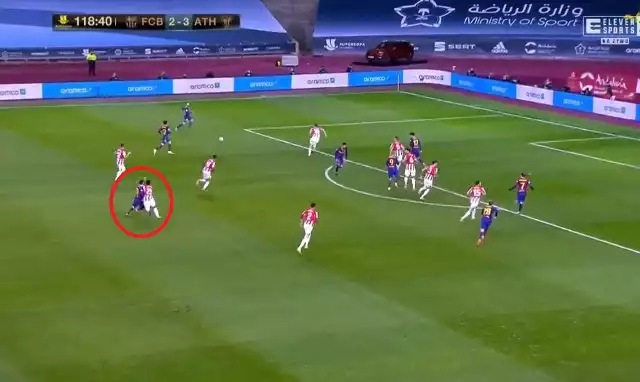

In [9]:
image

In [10]:
labels = ["a photo of a grass", "a photo of a football match", "a photo of red circle", "a photo of emirates"]

In [11]:
inputs = processor(text=labels,
                   images=image,
                   return_tensors="pt",
                   padding=True)

In [12]:
outputs = model(**inputs)

In [13]:
outputs

CLIPOutput(loss=None, logits_per_image=tensor([[12.9656, 22.1055, 18.7519, 18.0247]], grad_fn=<TBackward0>), logits_per_text=tensor([[12.9656],
        [22.1055],
        [18.7519],
        [18.0247]], grad_fn=<MulBackward0>), text_embeds=tensor([[ 0.0206,  0.0635,  0.0256,  ...,  0.0103,  0.0260,  0.0104],
        [-0.0076, -0.0188,  0.0557,  ...,  0.0048, -0.0184,  0.0352],
        [ 0.0256, -0.0010,  0.0132,  ...,  0.0226,  0.0006,  0.0377],
        [ 0.0030, -0.0087,  0.0602,  ..., -0.0507,  0.0269,  0.0247]],
       grad_fn=<DivBackward0>), image_embeds=tensor([[-3.4631e-03, -2.3168e-02, -1.6441e-02,  3.7373e-02,  1.9140e-02,
          3.2976e-02, -1.9280e-03,  1.1908e-02,  4.8415e-02, -2.8505e-03,
         -7.2550e-03, -2.7660e-02,  3.9164e-02, -1.1350e-02, -1.6904e-02,
         -2.1208e-02,  2.4147e-02, -1.3245e-02,  1.1386e-02, -3.4433e-02,
          4.3758e-02,  2.5870e-02, -8.7959e-03, -1.0076e-02,  2.7911e-02,
          6.3990e-02, -4.0527e-03,  1.6684e-02, -1.4511e-02,  1.1

In [14]:
outputs.logits_per_image

tensor([[12.9656, 22.1055, 18.7519, 18.0247]], grad_fn=<TBackward0>)

In [15]:
probs = outputs.logits_per_image.softmax(dim=1)[0]

In [16]:
probs

tensor([1.0200e-04, 9.5061e-01, 3.3233e-02, 1.6059e-02],
       grad_fn=<SelectBackward0>)

In [17]:
probs = list(probs)
for i in range(len(labels)):
  print(f"label: {labels[i]} - probability of {probs[i].item():.4f}")

label: a photo of a grass - probability of 0.0001
label: a photo of a football match - probability of 0.9506
label: a photo of red circle - probability of 0.0332
label: a photo of emirates - probability of 0.0161
